# Measurement sites locations

In this notebook we obtain the measurement site lat-lon coordinates and save it in a `geopandas.geoframe`.

#### Imports

In [16]:
import pandas as pd
import geopandas as gp
# import geohash
# import matplotlib as pl
# %matplotlib inline
import pathlib2
import plotly as pl
# import cufflinks as cl

In [7]:
import psycopg2
import psycopg2.extras

#### Filepath for the rdw.json containing the roads

Remeber to unzip this file from the repo.

In [3]:
RDW_FILEPATH = pathlib2.Path('../rdw.json')

#### Nice dataframe formatting

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#### Obtain the table from a running companion database and make some adjustments

In [8]:
con = None

try:
    con = psycopg2.connect(database='companion',
                           user='postgres',
                           password='snt',
                           host='0.0.0.0',
                           port='32768')
    
    cursor = con.cursor(cursor_factory=psycopg2.extras.RealDictCursor)
    cursor.execute("SELECT id, ndwid, name, ST_AsText(location), ST_AsKML(location), ST_AsLatLonText(location) FROM measurementsite;")
    
#     row = cursor.fetchone()
    mdf = pd.DataFrame.from_dict(cursor.fetchall())
    mdf.set_index(['id'], inplace=True)

except db.DatabaseError as e:
    print('Error %s' % e)
    sys.exit(1)
    
finally:
    
    if con:
        con.close()


In [9]:
mdf.head()

,name,ndwid,st_askml,st_aslatlontext,st_astext
id,,,,,
1,0010vwa0056ra,RWS01_MONIBAS_0010vwa0056ra,"<Point><coordinates>52.345428466796875,4.97720...","4°58'37.920""N 52°20'43.542""E",POINT(52.3454284667969 4.97720003128052)
2,0010vwa0065ra,RWS01_MONIBAS_0010vwa0065ra,"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E",POINT(52.3391418457031 4.98615980148315)
3,0010vwa0223ra,RWS01_MONIBAS_0010vwa0223ra,"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E",POINT(52.2840805053711 5.18365001678467)
4,0010vwa0248ra,RWS01_MONIBAS_0010vwa0248ra,"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E",POINT(52.2673492431641 5.20331001281738)
5,0010vwa0269ra,RWS01_MONIBAS_0010vwa0269ra,"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E",POINT(52.249340057373 5.21355009078979)


In [11]:
# mdf = mdf.rename(columns={'carriageway1': 'carriageway',
#                           'lengthaffected1': 'lengthaffected'})
mdf = mdf.rename(columns={'st_astext': 'geometry'})
# mdf['carriageway'] = mdf['carriageway'].astype('category')

In [12]:
mdf.head()

,name,ndwid,st_askml,st_aslatlontext,geometry
id,,,,,
1,0010vwa0056ra,RWS01_MONIBAS_0010vwa0056ra,"<Point><coordinates>52.345428466796875,4.97720...","4°58'37.920""N 52°20'43.542""E",POINT(52.3454284667969 4.97720003128052)
2,0010vwa0065ra,RWS01_MONIBAS_0010vwa0065ra,"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E",POINT(52.3391418457031 4.98615980148315)
3,0010vwa0223ra,RWS01_MONIBAS_0010vwa0223ra,"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E",POINT(52.2840805053711 5.18365001678467)
4,0010vwa0248ra,RWS01_MONIBAS_0010vwa0248ra,"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E",POINT(52.2673492431641 5.20331001281738)
5,0010vwa0269ra,RWS01_MONIBAS_0010vwa0269ra,"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E",POINT(52.249340057373 5.21355009078979)


In [7]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17655 entries, 1 to 17655
Data columns (total 2 columns):
ndwid       17655 non-null object
geometry    17655 non-null object
dtypes: object(2)
memory usage: 413.8+ KB


#### We are going to parse the location column

First select only the relevant number strings and split into a list.

In [13]:
ser = mdf['geometry'].apply(lambda p: p[6:-1].split(' '))

Then make each number in the list into the relevant coordinate by casting.

In [14]:
mdf['latitude'] = ser.apply(lambda p: float(p[0]))
mdf['longitude'] = ser.apply(lambda p: float(p[1]))
# mdf.drop(['location'], axis=1, inplace=True)
mdf.head()

,name,ndwid,st_askml,st_aslatlontext,geometry,latitude,longitude
id,,,,,,,
1,0010vwa0056ra,RWS01_MONIBAS_0010vwa0056ra,"<Point><coordinates>52.345428466796875,4.97720...","4°58'37.920""N 52°20'43.542""E",POINT(52.3454284667969 4.97720003128052),52.345428,4.97720
2,0010vwa0065ra,RWS01_MONIBAS_0010vwa0065ra,"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E",POINT(52.3391418457031 4.98615980148315),52.339142,4.98616
3,0010vwa0223ra,RWS01_MONIBAS_0010vwa0223ra,"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E",POINT(52.2840805053711 5.18365001678467),52.284081,5.18365
4,0010vwa0248ra,RWS01_MONIBAS_0010vwa0248ra,"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E",POINT(52.2673492431641 5.20331001281738),52.267349,5.20331
5,0010vwa0269ra,RWS01_MONIBAS_0010vwa0269ra,"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E",POINT(52.249340057373 5.21355009078979),52.249340,5.21355



#### Convert to geopandas.GeoDataFrame

In [26]:
con = psycopg2.connect(database='companion',
                       user='postgres',
                       password='snt',
                       host='0.0.0.0',
                       port='32768')

qry = "SELECT id, ndwid, name, location, ST_AsKML(location), ST_AsLatLonText(location) FROM measurementsite;"

mdf = gp.GeoDataFrame.from_postgis(qry, con, geom_col='location')
mdf.head()

,id,ndwid,name,location,st_askml,st_aslatlontext
0,1,RWS01_MONIBAS_0010vwa0056ra,0010vwa0056ra,POINT (52.34542846679688 4.977200031280518),"<Point><coordinates>52.345428466796875,4.97720...","4°58'37.920""N 52°20'43.542""E"
1,2,RWS01_MONIBAS_0010vwa0065ra,0010vwa0065ra,POINT (52.33914184570312 4.986159801483154),"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E"
2,3,RWS01_MONIBAS_0010vwa0223ra,0010vwa0223ra,POINT (52.28408050537109 5.183650016784668),"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E"
3,4,RWS01_MONIBAS_0010vwa0248ra,0010vwa0248ra,POINT (52.26734924316406 5.203310012817383),"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E"
4,5,RWS01_MONIBAS_0010vwa0269ra,0010vwa0269ra,POINT (52.24934005737305 5.213550090789795),"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E"


In [27]:
mdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17651 entries, 0 to 17650
Data columns (total 6 columns):
id                 17651 non-null int64
ndwid              17651 non-null object
name               17651 non-null object
location           17651 non-null object
st_askml           17651 non-null object
st_aslatlontext    17651 non-null object
dtypes: int64(1), object(5)
memory usage: 827.5+ KB


In [40]:
def parse(row):
#     print(row)
    name = row['ndwid']
    kml = row['st_askml']
    result = '<Placemark id="{}">'.format(name)
    result += kml
    result += '</Placemark>'
    return result

In [42]:
mdf['kml_element'] = mdf.apply(parse, axis=1)
mdf.head()

,id,ndwid,name,location,st_askml,st_aslatlontext,kml_element
0,1,RWS01_MONIBAS_0010vwa0056ra,0010vwa0056ra,POINT (52.34542846679688 4.977200031280518),"<Point><coordinates>52.345428466796875,4.97720...","4°58'37.920""N 52°20'43.542""E","<Placemark id=""RWS01_MONIBAS_0010vwa0056ra""><P..."
1,2,RWS01_MONIBAS_0010vwa0065ra,0010vwa0065ra,POINT (52.33914184570312 4.986159801483154),"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E","<Placemark id=""RWS01_MONIBAS_0010vwa0065ra""><P..."
2,3,RWS01_MONIBAS_0010vwa0223ra,0010vwa0223ra,POINT (52.28408050537109 5.183650016784668),"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E","<Placemark id=""RWS01_MONIBAS_0010vwa0223ra""><P..."
3,4,RWS01_MONIBAS_0010vwa0248ra,0010vwa0248ra,POINT (52.26734924316406 5.203310012817383),"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E","<Placemark id=""RWS01_MONIBAS_0010vwa0248ra""><P..."
4,5,RWS01_MONIBAS_0010vwa0269ra,0010vwa0269ra,POINT (52.24934005737305 5.213550090789795),"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E","<Placemark id=""RWS01_MONIBAS_0010vwa0269ra""><P..."


In [44]:
kml = mdf['kml_element']
kml.to_csv('sites.kml')

In [57]:
selection = gp.read_file('../selection.geojson')[['Name', 'geometry']]
selection.head()

,Name,geometry
0,selection,POLYGON Z ((4.322742733269624 52.0722001465526...


In [58]:
selected_sites = mdf[mdf['location'] == (mdf['location'].geometry - polygon.geometry)]
selected_sites.head()

/usr/local/share/miniconda/envs/companionenv/lib/python3.5/site-packages/geopandas/base.py:30: UserWarning:

GeoSeries crs mismatch: None and {'init': 'epsg:4326'}



,id,ndwid,name,location,st_askml,st_aslatlontext,kml_element
1,2,RWS01_MONIBAS_0010vwa0065ra,0010vwa0065ra,POINT (52.33914184570312 4.986159801483154),"<Point><coordinates>52.339141845703125,4.98615...","4°59'10.175""N 52°20'20.911""E","<Placemark id=""RWS01_MONIBAS_0010vwa0065ra""><P..."
2,3,RWS01_MONIBAS_0010vwa0223ra,0010vwa0223ra,POINT (52.28408050537109 5.183650016784668),"<Point><coordinates>52.284080505371094,5.18365...","5°11'1.140""N 52°17'2.690""E","<Placemark id=""RWS01_MONIBAS_0010vwa0223ra""><P..."
3,4,RWS01_MONIBAS_0010vwa0248ra,0010vwa0248ra,POINT (52.26734924316406 5.203310012817383),"<Point><coordinates>52.267349243164062,5.20331...","5°12'11.916""N 52°16'2.457""E","<Placemark id=""RWS01_MONIBAS_0010vwa0248ra""><P..."
4,5,RWS01_MONIBAS_0010vwa0269ra,0010vwa0269ra,POINT (52.24934005737305 5.213550090789795),"<Point><coordinates>52.249340057373047,5.21355...","5°12'48.780""N 52°14'57.624""E","<Placemark id=""RWS01_MONIBAS_0010vwa0269ra""><P..."
5,6,RWS01_MONIBAS_0010vwa0286ra,0010vwa0286ra,POINT (52.23783111572266 5.22790002822876),"<Point><coordinates>52.237831115722656,5.22790...","5°13'40.440""N 52°14'16.192""E","<Placemark id=""RWS01_MONIBAS_0010vwa0286ra""><P..."


In [61]:
selected_sites_names = selected_sites['ndwid']

#### We use geopandas and matplotlib to mark the sites 

In [11]:
rdw = gp.GeoDataFrame.from_file(str(RDW_FILEPATH))['geometry']
rdw.head()

0    LINESTRING Z (3.59686374664 51.4568066597 0, 3...
1    LINESTRING Z (3.59685301781 51.4569568634 0, 3...
2    LINESTRING Z (3.86214494705 51.4839291573 0, 3...
3    LINESTRING Z (3.87001991272 51.4827382565 0, 3...
4    LINESTRING Z (3.87071728706 51.486364603 0, 3....
Name: geometry, dtype: object

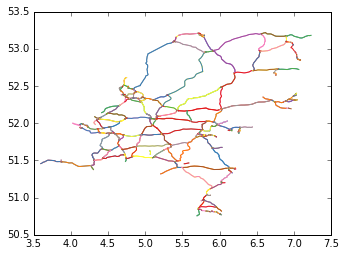

In [17]:
roads = rdw.plot()

In [20]:
mdf.plot?

AttributeError: 'str' object has no attribute 'type'

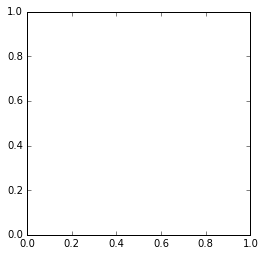

In [26]:
sites = mdf.plot()